## **1. Import the necessary libraries**
---

In [239]:
import datetime
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
import os

from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix

print("Versions of key libraries")
print("---")
print("tensorflow: ", tf.__version__)
print("numpy:      ", np.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)

Versions of key libraries
---
tensorflow:  2.10.0
numpy:       1.21.5
matplotlib:  3.5.1
sklearn:     1.0.2


## **2.Create a function to plot image without axis**
---

In [240]:
def implt(img):
    plt.figure()
    plt.imshow(img)
    plt.axis('off')

print(implt)

x = datetime.datetime.now()
filename = x.strftime("%Y") + x.strftime("%m") + x.strftime("%d") + x.strftime("%H") + x.strftime("%M")

<function implt at 0x0000021265D89940>


## **3. Set matplotlib to have seaborn plot style**
---

In [241]:
plt.style.use('seaborn')                   # if want to use the default style, set 'classic'
plt.rcParams['ytick.right']     = True
plt.rcParams['ytick.labelright']= True
plt.rcParams['ytick.left']      = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['figure.figsize']  = [7,7]   # Set the figure size to be 7 inch for (width,height)

print("Matplotlib setup completes.")

Matplotlib setup completes.


# **4.1 Downsize original images (Optional)**

In [242]:
image_size = 32

def resize_image(source_data_dir):
    data = []
    
    os.chdir(source_data_dir)
    
    for label in labels:
        path = source_data_dir
        
        for image in os.listdir(path):
            print(image)
            # try:
            # Convert BGR to RGB
            image_array = cv2.imread(os.path.join(path, image))
            print(image_array.shape)
            # Resize image
            resized_array = cv2.resize(image_array, (image_size, image_size))
            # print(target)
            cv2.imwrite("downsized_" + image, resized_array)
            # except Exception as e:
            #     print(e)

In [243]:
# resize_image('C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\FishOrNotFishReduced\\Train\\Fish')
# 'C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\FishOrNotFishReducedabc_2\\Test\\Fish')

In [244]:
print(os.getcwd())

C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode


# **4.2 Prepare Fish Or Not Fish data for training and testing**

In [245]:
labels = [
    'Fish',
    'NotFish'
]
# labels = [
# '004_aquatic_fish_aquarium_fish',
# '005_aquatic_fish_flatfish',
# '006_aquatic_fish_ray',
# '007_aquatic_fish_shark',
# '008_aquatic_fish_trout',
# '009_aquatic_mammals_beaver',
# '010_aquatic_mammals_dolphin',
# '011_aquatic_mammals_otter',
# '012_aquatic_mammals_seal',
# '013_aquatic_mammals_whale',
# '014_flowers_orchid',
# '015_flowers_poppy',
# '016_flowers_rose',
# '017_flowers_sunflower',
# '018_flowers_tulip',
# '019_food_containers_bottle',
# '020_food_containers_bowl',
# '021_food_containers_can',
# '022_food_containers_cup',
# '023_food_containers_plate',
# '024_fruit_and_vegetables_apple',
# '025_fruit_and_vegetables_mushroom',
# '026_fruit_and_vegetables_orange',
# '027_fruit_and_vegetables_pear',
# '028_fruit_and_vegetables_sweet_pepper',
# '029_household_electrical_devices_clock',
# '030_household_electrical_devices_keyboard',
# '031_household_electrical_devices_lamp',
# '032_household_electrical_devices_telephone',
# '033_household_electrical_devices_television',
# '034_household_furniture_bed',
# '035_household_furniture_chair',
# '036_household_furniture_couch',
# '037_household_furniture_table',
# '038_household_furniture_wardrobe',
# '039_insects_bee',
# '040_insects_beetle',
# '041_insects_butterfly',
# '042_insects_caterpillar',
# '043_insects_cockroach',
# '044_large_carnivores_bear',
# '045_large_carnivores_leopard',
# '046_large_carnivores_lion',
# '047_large_carnivores_tiger',
# '048_large_carnivores_wolf',
# '049_large_man_made_outdoor_things_bridge',
# '050_large_man_made_outdoor_things_castle',
# '051_large_man_made_outdoor_things_house',
# '052_large_man_made_outdoor_things_road',
# '053_large_man_made_outdoor_things_skyscraper',
# '054_large_natural_outdoor_scenes_cloud',
# '055_large_natural_outdoor_scenes_forest',
# '056_large_natural_outdoor_scenes_mountain',
# '057_large_natural_outdoor_scenes_plain',
# '058_large_natural_outdoor_scenes_sea',
# '059_large_omnivores_and_herbivores_camel',
# '060_large_omnivores_and_herbivores_cattle',
# '061_large_omnivores_and_herbivores_chimpanzee',
# '062_large_omnivores_and_herbivores_elephant',
# '063_large_omnivores_and_herbivores_kangaroo',
# '064_medium_mammals_fox',
# '065_medium_mammals_porcupine',
# '066_medium_mammals_possum',
# '067_medium_mammals_raccoon',
# '068_medium_mammals_skunk',
# '069_non_insect_invertebrates_crab',
# '070_non_insect_invertebrates_lobster',
# '071_non_insect_invertebrates_snail',
# '072_non_insect_invertebrates_spider',
# '073_non_insect_invertebrates_worm',
# '074_people_baby',
# '075_people_boy',
# '076_people_girl',
# '077_people_man',
# '078_people_woman',
# '079_reptiles_crocodile',
# '080_reptiles_dinosaur',
# '081_reptiles_lizard',
# '082_reptiles_snake',
# '083_reptiles_turtle',
# '084_small_mammals_hamster',
# '085_small_mammals_mouse',
# '086_small_mammals_rabbit',
# '087_small_mammals_shrew',
# '088_small_mammals_squirrel',
# '089_trees_maple_tree',
# '090_trees_oak_tree',
# '091_trees_palm_tree',
# '092_trees_pine_tree',
# '093_trees_willow_tree',
# '094_vehicles_1_bicycle',
# '095_vehicles_1_bus',
# '096_vehicles_1_motorcycle',
# '097_vehicles_1_pickup_truck',
# '098_vehicles_1_train',
# '099_vehicles_2_lawn_mower',
# '100_vehicles_2_rocket',
# '101_vehicles_2_streetcar',
# '102_vehicles_2_tank',
# '103_vehicles_2_tractor'    
# ]

In [246]:
image_size = 32

def get_data(data_dir):
    data = []
    
    for label in labels:
        path = os.path.join(data_dir, label)
        class_number = labels.index(label)
        
        for image in os.listdir(path):
            try:
                # Convert BGR to RGB
                image_array = cv2.imread(os.path.join(path, image))[...,::-1]
                # Resize image
                resized_array = cv2.resize(image_array, (image_size, image_size))
                resized_array = resized_array / 255.0
                
#                 image = tf.keras.utils.load_img(os.path.join(path, image), target_size = None, keep_aspect_ratio = True)

#                 resized_array = tf.keras.utils.img_to_array(image)
#                 resized_array = tf.keras.preprocessing.image.smart_resize(resized_array, size = (image_size, image_size))
#                 # resized_array = tf.expand_dims(image_array, 0)
#                 resized_array = resized_array / 255.0
                
                data.append([resized_array, class_number])
                
            
            except Exception as e:
                print(e)
                
    return np.array(data)
    
# Fetch Train and Test Data
train = get_data("C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\FishOrNotFishReduced_1_CifarOnly2\\Train")
val = get_data("C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\FishOrNotFishReduced_1_CifarOnly2\\Test")

# train = get_data("C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\dataset\\FishOrNotFish_CifarOnly\\Train")
# train = get_data("C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\validate\\Cifar100MC\\Train")
# val = get_data("C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\validate\\Cifar100MC\\Test")

#                                                                                 # Step 1
# data            = cifar100.load_data(label_mode='coarse')
# (trDat, trLbl)  = data[0]
# (tsDat, tsLbl)  = data[1]

#                                                                                 # Step 2
# print("The shape of trDat is", trDat.shape, "and the type of trDat is", trDat.dtype)
# print("The shape of tsDat is", tsDat.shape, "and the type of tsDat is", tsDat.dtype)
# print("")
# print("The shape of trLbl is", trLbl.shape, "and the type of trLbl is", trLbl.dtype)
# print("The shape of tsLbl is", tsLbl.shape, "and the type of tsLbl is", tsLbl.dtype)

#                                                                                 # Step 3
# trDat           = trDat.astype('float32')/255
# tsDat           = tsDat.astype('float32')/255

#                                                                                 # Step 4
# imgrows         = trDat.shape[1]
# imgclms         = trDat.shape[2]
# channel         = trDat.shape[3]

#                                                                                 # Step 5
# trLbl           = to_categorical(trLbl)
# tsLbl           = to_categorical(tsLbl)
                               
# num_classes     = tsLbl.shape[1]                                                # Step 6

C:\Users\jerem\AppData\Local\Temp\ipykernel_32016\2574802966.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [247]:
print(train.shape)

(3000, 2)


In [248]:
# print(val.shape)

In [249]:
l = []

for i in train:
    # print(i[1])
    l.append(labels[i[1]])
    # if(i[1] == 0):
    #     l.append("Fish")
    # else:
    #     l.append("NotFish")

3000


C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

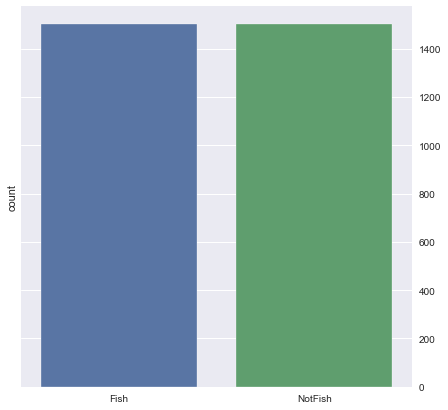

In [250]:
print(len(l))

sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Fish')

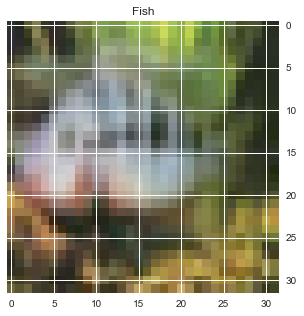

In [251]:
plt.figure(figsize = (5, 5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'NotFish')

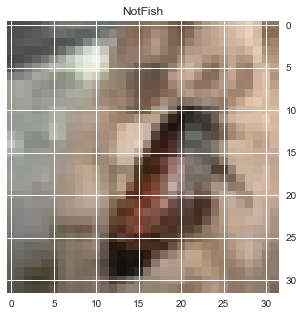

In [252]:
plt.figure(figsize = (5, 5))
plt.imshow(train[1501][0])
plt.title(labels[train[1501][1]])

## **5. Perform Pre-Processing and Augmentation**

In [253]:
x_train = []
y_train = []

x_val = []
y_val = []

for feature, label in train:
    # print("Train Feature: ", feature)
    # print("Train Label: ", label)
    x_train.append(feature)
    y_train.append(label)
    
for feature, label in val:
    # print("Test Feature: ", feature)
    # print("Test Label: ", label)
    x_val.append(feature)
    y_val.append(label)

In [254]:
# Normalization

# From CB
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 0)


x_train = np.array(x_train) / 255.0
x_val = np.array(x_val) / 255.0

# y_train = np.array(y_train) / 255
# y_test = np.array(y_test) / 255

In [255]:
print(x_train.shape)
print(x_val.shape)


(3000, 32, 32, 3)
(600, 32, 32, 3)


In [256]:
# From CB
# x_train = x_train / 255.0

x_train.reshape(-1, image_size, image_size, 1)
y_train = np.array(y_train)

# y_train = np.array(y_train, dtype = "int32")
# y_train = y_train.reshape(-1, 2)

# From CB
# x_val = x_val / 255.0

x_val.reshape(-1, image_size, image_size, 1)
y_val = np.array(y_val)
# y_val = np.array(y_val, dtype = "int32")
# y_val = y_val.reshape(-1, 2)

In [257]:
print(y_train.shape)
print(y_val.shape)

(3000,)
(600,)


In [258]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## **6. Define the Model**

In [259]:
seed = 29
np.random.seed(seed)

optmz       = optimizers.RMSprop(learning_rate=0.0001)                                     # Step 1
modelname   = 'Hybrid_Cifar100'                                                          # Step 2

image_height = image_size  
image_width = image_size
channel = 3
                                                                                # Step 3
def createModel():
    model = Sequential()

    model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (image_height, image_width, channel), padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(512, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(len(labels), activation = 'softmax'))

    # model.compile(loss = 'binary_crossentropy', optimizer = optmz, metrics = ['accuracy'])
    model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = optmz, metrics = ['accuracy'])

    return model

                                                                                # Step 4
model       = createModel()   # This is meant for training
modelGo     = createModel()   # This is used for final testing

model.summary()                                                                 # Step 5

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_85 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_56 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_86 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_87 (Conv2D)          (None, 16, 16, 256)       590080    
                                                     



## **7. Create the callbacks to be applied during training**
---
* Step 1: Create a callback to save the model from an epoch when validation accuracy is the highest
* Step 2: Create a callback to save the training loss, training accuracy, validation loss and validation accuracy of each epoch into a csv file
* Step 3: Put the two callbacks objects into a list

In [260]:
                                                                                # Step 1
folderpath      = "C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\models\\"# '/content/gdrive/My Drive/iss/prumls/colab/'
filepath        = folderpath + modelname + "_" + filename + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath + modelname + "_" + filename + ".csv")                       # Step 2
callbacks_list  = [checkpoint,csv_logger]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath + modelname + "_" + filename + ".csv")

Callbacks created:

Path to model: C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode\models\Hybrid_Cifar100_202210011732.hdf5
Path to log:   C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode\models\Hybrid_Cifar100_202210011732.csv


## **8. Train the deep learning model**
___

In [261]:
history = model.fit(x_train,                            # Training data
          y_train,                            # Training label
          validation_data = (x_val, y_val),   # Validation data and label
          epochs = 50,                       # The amount of epochs to be trained
          batch_size = 128,                   
          shuffle = True,                     # To shuffle the training data
          callbacks = callbacks_list)         # Callbacks to execute the checkpoints


# datagen.flow(x_train, y_train, batch_size=32,
#          subset='training'),
#          validation_data=datagen.flow(x_train, y_train,
#          batch_size=8, subset='validation')

# history = model.fit(x_train,                            # Training data
#           validation_data = x_val,   # Validation data and label
#           epochs = 50,                       # The amount of epochs to be trained
#           batch_size = 32,                   
#           shuffle = True,                     # To shuffle the training data
#           callbacks = callbacks_list)         # Callbacks to execute the checkpoints

Epoch 1/50


C:\Users\jerem\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - 3s 53ms/step - loss: 0.7383 - accuracy: 0.4907 - val_loss: 0.7331 - val_accuracy: 0.5000
Epoch 2/50
24/24 [==============================] - 1s 45ms/step - loss: 0.7289 - accuracy: 0.5150 - val_loss: 0.7228 - val_accuracy: 0.5733
Epoch 3/50
24/24 [==============================] - 1s 45ms/step - loss: 0.7184 - accuracy: 0.5533 - val_loss: 0.7004 - val_accuracy: 0.6367
Epoch 4/50
24/24 [==============================] - 1s 42ms/step - loss: 0.6921 - accuracy: 0.5797 - val_loss: 0.7313 - val_accuracy: 0.5583
Epoch 5/50
24/24 [==============================] - 1s 42ms/step - loss: 0.7016 - accuracy: 0.5697 - val_loss: 0.7581 - val_accuracy: 0.5433
Epoch 6/50
24/24 [==============================] - 1s 42ms/step - loss: 0.6764 - accuracy: 0.6023 - val_loss: 0.7153 - val_accuracy: 0.5500
Epoch 7/50
24/24 [==============================] - 1s 42ms/step - loss: 0.6689 - accuracy: 0.6060 - val_loss: 0.6371 - val_accuracy: 0.6300
Epoch 8/50
24/24 [======

## **9. Evaluate Results**
---

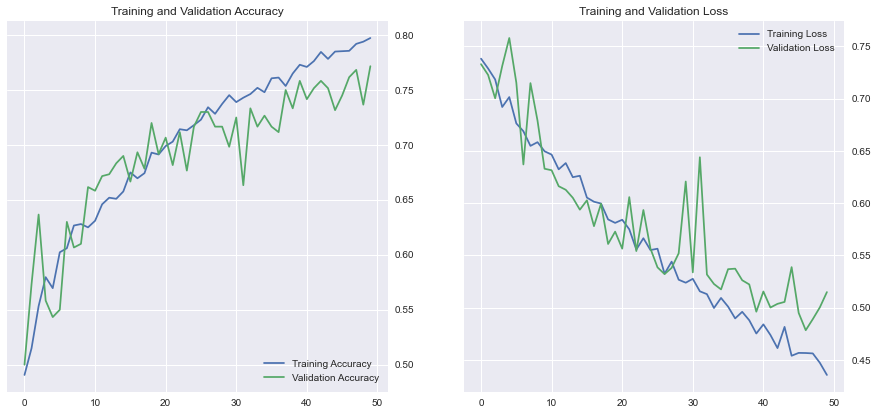

In [262]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()


## **10. Review classification metrics**
---


In [263]:
print(x_val.shape)
print(y_val.shape)

(600, 32, 32, 3)
(600,)


In [264]:
modelGo.load_weights(filepath)
modelGo.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                optimizer = optmz, 
                metrics=['accuracy'])

# predicts    = modelGo.predict(x_val)   
predicts = np.argmax(model.predict(x_val), axis=-1)
# Step 2
print("Prediction completes.")

# predictions = model.predict(x_test)
# predictions = predictions.reshape(1, -1)[0]
# Step 1
# labelname   = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
# 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
# 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
# 'bottles', 'bowls', 'cans', 'cups', 'plates',
# 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
# 'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
# 'bed', 'chair', 'couch', 'table', 'wardrobe',
# 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
# 'bear', 'leopard', 'lion', 'tiger', 'wolf',
# 'bridge', 'castle', 'house', 'road', 'skyscraper',
# 'cloud', 'forest', 'mountain', 'plain', 'sea',
# 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
# 'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
# 'crab', 'lobster', 'snail', 'spider', 'worm',
# 'baby', 'boy', 'girl', 'man', 'woman',
# 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
# 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
# 'maple', 'oak', 'palm', 'pine', 'willow',
# 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
# 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

# labelname = ['aquatic mammals',
# 'fish',
# 'flowers',
# 'food containers',
# 'fruit and vegetables',
# 'household electrical devices',
# 'household furniture',
# 'insects',
# 'large carnivores',
# 'large man-made outdoor things',
# 'large natural outdoor scenes',
# 'large omnivores and herbivores',
# 'medium-sized mammals',
# 'non-insect invertebrates',
# 'people',
# 'reptiles',
# 'small mammals',
# 'trees',
# 'vehicles 1',
# 'vehicles 2'
# ]
                                                                                # Step 2


19/19 [==============================] - 1s 23ms/step
Prediction completes.


In [265]:
print(predicts.shape)

(600,)


In [266]:
# val_pred = np.argmax(model.predict(x_val), axis=-1)
print("Predicts : ", predicts)
# predicts = predicts.flatten()
# print(predicts.round(2))

# predicts = predicts.reshape(1, -1)[0]
# preds = np.argmax(abs(predicts))

# print(y_val.shape)

# print("Preds: ", preds)
print(classification_report(y_val, predicts))# target_names = ['Fish (Class 0)','Not Fish (Class 1)']))

Predicts :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 0 

## **13. Save the model plot**
---

In [267]:
plotpath  = folderpath + modelname + "_" + filename + '_plot.png'
plot_model(model, 
           to_file=plotpath, 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

print("Path to plot:", plotpath)

Path to plot: C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode\models\Hybrid_Cifar100_202210011732_plot.png


In [268]:
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################

In [272]:
# Hybrid_Cifar100_202210011556_plot - FishOrNotFishReduced_1_CifarOnly
# Hybrid_Cifar100_202210011604_plot - Full and Mixed
model_file = "C:\\Users\\jerem\\VirtualBox VMs\\Ubuntu\\Shared\\IRS_Project\\GitHub\\PRMLS_Project\\SystemCode\\models\\Hybrid_Cifar100_202210011732.hdf5"

image_height = image_size
image_width = image_size

def predict_new_image(image):
    image_name = image

    # image_array = cv2.imread(os.path.join(path, image))[...,::-1]
    # Resize image
    # image_array = cv2.imread(image)[...,::-1]
    # image_array = cv2.resize(image_array, (image_size, image_size))
    # image_array = image_array / 255.0
    
    image = tf.keras.utils.load_img(image, target_size = None, keep_aspect_ratio = True)
    
    image_array = tf.keras.utils.img_to_array(image)
    image_array = tf.keras.preprocessing.image.smart_resize(image_array, size = (image_height, image_width))
    image_array = tf.expand_dims(image_array, 0)
    image_array = image_array / 255.0
    
    saved_model = load_model(model_file)
    
    predictions = saved_model.predict(image_array)
    # predictions = predictions.flatten()
    # score = np.where(predictions > 0.5, 1, 0)
    score = tf.nn.softmax(predictions[0])
    
    # plt.imshow()
    # plt.show()
    # print("Predictions: ", predictions)
    # print("Score: ", score)
    print(image_name, 
        " most likely belongs to {} with a {:.2f} percent confidence."
        .format(labels[np.argmax(score)], 100 * np.max(score))
    )

In [273]:
print(model_file)

predict_new_image("validate/jeremy.jpg")
predict_new_image("validate/tree.jpg")
predict_new_image("validate/fish.jpg")
predict_new_image("validate/cockroach.jpg")
predict_new_image("validate/starfish.jpg")
predict_new_image("validate/whale.jpg")
predict_new_image("validate/car.jpg")
predict_new_image("validate/seal.jpg")
predict_new_image("validate/beaver.jpg")
predict_new_image("validate/betta.jpg")
predict_new_image("validate/betta1.jpg")

C:\Users\jerem\VirtualBox VMs\Ubuntu\Shared\IRS_Project\GitHub\PRMLS_Project\SystemCode\models\Hybrid_Cifar100_202210011732.hdf5
1/1 [==============================] - 0s 84ms/step
validate/jeremy.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
1/1 [==============================] - 0s 87ms/step
validate/tree.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
1/1 [==============================] - 0s 87ms/step
validate/fish.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
1/1 [==============================] - 0s 81ms/step
validate/cockroach.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
1/1 [==============================] - 0s 87ms/step
validate/starfish.jpg  most likely belongs to NotFish with a 73.11 percent confidence.
1/1 [==============================] - 0s 87ms/step
validate/whale.jpg  most likely belongs to Fish with a 73.11 percent confidence.
1/1 [==============================] - 0s 84ms/step
